In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

import time
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from keras.utils import to_categorical


time_periods = 20 #frame
number_sensors = 84 #keypoint
input_shape = (time_periods * number_sensors)

# Load CSV dataset with X (training data) and Y (label)
raw_dataset = numpy.loadtxt("HAND_ALL_OneRow.csv", delimiter = ",") 
X = raw_dataset[:, 0:1680] # 양손 keypoint값
y = raw_dataset[:, 1680] # class label

transformer = Normalizer().fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train)

/content/drive/MyDrive/suna
[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


하나의 라벨은 42개의 keypoint * 20개의 frame

time step : 20
features : 42

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

640
160


In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten, Activation, Reshape
from keras import optimizers

model = Sequential() # Sequeatial Model
model.add(Reshape((time_periods, number_sensors), input_shape=(input_shape,)))
model.add(Bidirectional(LSTM(20, return_sequences=True))) # (timestep, feature)
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(10, activation = "softmax")) # output = 10
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 20, 84)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 40)           16800     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 20, 40)           9760      
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
40/40 [==============================] - 5s 9ms/step - loss: 0.0900 - accuracy: 0.0906
Epoch 2/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0897 - accuracy: 0.1203
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0868 - accuracy: 0.1750
Epoch 4/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0830 - accuracy: 0.2141
Epoch 5/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0775 - accuracy: 0.3141
Epoch 6/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0710 - accuracy: 0.3828
Epoch 7/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0644 - accuracy: 0.4734
Epoch 8/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0635 - accuracy: 0.4625
Epoch 9/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0570 - accuracy: 0.5344
Epoch 10/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0529 - accuracy: 0.5734
Epoch 11/

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32, verbose = 0)
print("Score: ", loss_and_metrics)

5/5 [==============================] - 2s 5ms/step - loss: 0.0261 - accuracy: 0.8375
Score:  [0.026083718985319138, 0.8374999761581421]


In [ ]:
from matplotlib import pyplot

train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print(train_acc, test_acc)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

[0.011928163468837738, 0.917187511920929] [0.026083718985319138, 0.8374999761581421]


confusion matrix

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
predicted = y_pred.argmax(axis=-1)
y_labels = y_test.argmax(axis=-1)

5/5 [==============================] - 1s 5ms/step


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_labels, predicted)
print(cm)

[[16  0  0  0  0  2  0  0  1  0]
 [ 0  5  0  4  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  3  0 14  1  0  1  0  0  0]
 [ 0  0  1  0 10  0  0  0  0  0]
 [ 0  0  1  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0 10  1  0  0]
 [ 0  0  0  0  0  0  8  8  0  0]
 [ 0  0  0  0  0  0  0  1 14  2]
 [ 0  0  0  0  0  0  0  0  0 20]]


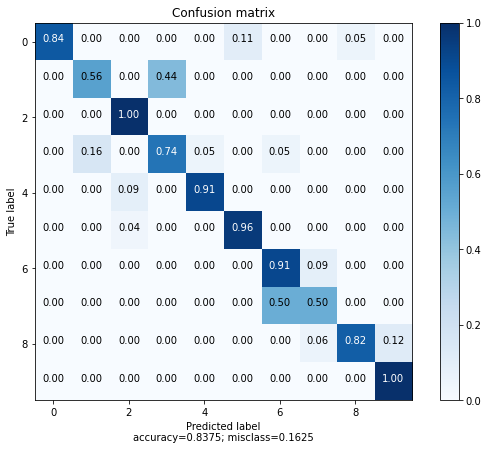

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import itertools
from itertools import product

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

p= plot_confusion_matrix(cm)

In [ ]:
for i in range(160):
  if(y_labels[i] == predicted[i]):
    print('True : ', y_labels[i], 'Predict : ', predicted[i])
  else:
    print('Predict Failed!!!! True : ', y_labels[i], 'Predict : ', predicted[i])

5/5 [==============================] - 0s 6ms/step
True :  3 Predict :  3
True :  6 Predict :  6
True :  3 Predict :  3
True :  0 Predict :  0
True :  6 Predict :  6
True :  5 Predict :  5
True :  2 Predict :  2
True :  7 Predict :  7
True :  4 Predict :  4
True :  2 Predict :  2
True :  0 Predict :  0
True :  3 Predict :  3
True :  9 Predict :  9
True :  9 Predict :  9
True :  0 Predict :  0
True :  0 Predict :  0
True :  4 Predict :  4
True :  2 Predict :  2
True :  2 Predict :  2
Predict Failed!!!! True :  5 Predict :  2
True :  8 Predict :  8
True :  1 Predict :  1
True :  8 Predict :  8
True :  6 Predict :  6
True :  9 Predict :  9
True :  5 Predict :  5
Predict Failed!!!! True :  1 Predict :  3
True :  3 Predict :  3
True :  5 Predict :  5
True :  7 Predict :  7
True :  6 Predict :  6
Predict Failed!!!! True :  7 Predict :  6
True :  1 Predict :  1
Predict Failed!!!! True :  6 Predict :  7
True :  3 Predict :  3
True :  0 Predict :  0
True :  3 Predict :  3
True :  7 Predict :  7

In [ ]:
%cd /content/drive/MyDrive

model.save("AIHUB_BLSTM.h5")

/content/drive/MyDrive/suna
